In [97]:
# задания третьего урока 
# https://stepik.org/lesson/375668/step/1?unit=363418

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Напишите функцию read_n_agg, которая
# принимает на вход один параметр – путь к файлу
# считывает переданный файл, в котором разделителем является ;
# считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
# возвращает результат этих действий (агрегированный датафрэйм)

def create_df(url):
    df = pd.read_csv(url, sep=';')
    return (df.groupby('company')
             .agg({'income': 'median'}))
    
    
     

In [16]:
df = create_df('https://stepik.org/media/attachments/lesson/359209/companies.csv')

In [17]:
df.head()

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10


In [22]:
# Вернемся к данным по поездкам на такси! На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой 
# других деталей!
# journey_id – уникальный id поездки
# user_id – id пользователя
# driver_id – id водителя
# taxi_id – id машины
# icon – тип поездки
# start_type – тип заказа (asap, reserved, delayed)
# start_at – время начала поездки
# start_lat – исходное местоположение пользователя, широта
# start_lon – исходное местоположение пользователя, долгота
# end_at – время окончания поездки
# end_lat – итоговое местоположение, широта
# end_lon – итоговое местоположение, долгота
# end_state – состояние заказа
# driver_start_lat – исходное местоположение водителя, широта
# driver_start_lon – исходное местоположение водителя, долгота
# arrived_at – время прибытия водителя
# source – платформа, с которой сделан заказ
# driver_score – оценка водителя клиентом
# rider_score – оценка клиента водителем
# Импортируйте pandas как pd. Загрузите датасет, используя ; в качестве разделителя. Также укажите, что столбцы start_at, 
# end_at, arrived_at нужно прочитать как даты (параметр parse_dates). Результат запишите в taxi.

taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [23]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [95]:
# Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

(taxi.groupby('source')
    .agg({'source': 'count'})
    .rename(columns = {'source': 'counts'})
    .sort_values('counts', ascending = False)
    .head(1) 
    .div(taxi.shape[0])
    .mul(100)
    .round(0))

,counts
source,
iPhone,42.0


In [98]:
# Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
# Посчитайте частоту встречаемости каждой из оценок
# Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
# Сбросьте индексы
# Переименуйте колонки в driver_score и percentage
# Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
# Запишите результат в driver_score_counts

driver_score_counts = (taxi.driver_score
                         .value_counts(normalize = True)
                         .mul(100)
                         .round(2)
                         .reset_index()
                         .rename(columns={'index': 'driver_score','driver_score': 'percentage'})
                         .sort_values('driver_score')) 

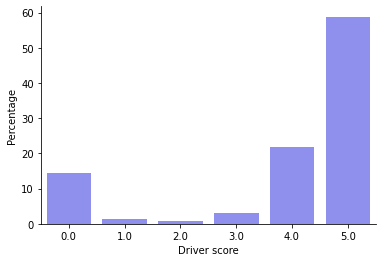

In [102]:
# Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

# ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)
# ax.set(xlabel='Driver score', ylabel='Percentage')
# sns.despine()  # убрать часть рамки графика
# plt.show()

ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

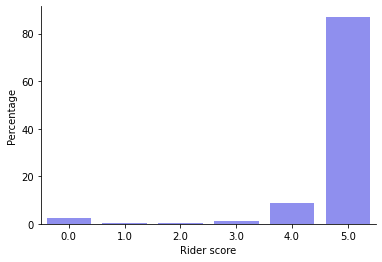

In [105]:
# Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от 
# распределения оценок водителей?     

rider_score_counts = (taxi.rider_score
                        .value_counts(normalize = True)
                        .mul(100)
                        .round(2)
                        .reset_index()
                        .rename(columns={'index': 'rider_score','rider_score': 'percentage'})
                        .sort_values('rider_score')) 

ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()